# Héctor J. Aparicio Muñoz
## TENDENCIAS EMERGENTES EN CIBERSEGURIDAD
### _Ejercicios del Tema 4: Procesos dinámicos en grafos. Aplicación a APTs_

**A partir del grafo dado vamos a calcular primeramente su matriz de adyacencia:**

In [1]:
# Ya que la necesitaremos durante todo lo que queda de práctica, importamos la librería Numpy y la 
# renombramos como np
import numpy as np

In [2]:
# Primeramente introduzco el grafo simple no dirigido sobre el que vamos a trabajar en un diccionario de Python.
# Las claves del diccionario serán los nodos y los valores serán los nodos conectados con el nodo clave.
G = {1:[2, 3, 5], 2:[1, 3, 4, 5, 6], 3:[1, 2, 6], 4:[2, 5], 5:[1, 2, 4, 6], 6:[2, 3, 5]}

In [3]:
# Calculo su matriz de adyacencia mediante la función definida en la Práctica del Tema 1 de Teoría de Grafos
def matriz_adyacencia(grafo):
    '''
    Crea la matriz de adyacencia a partir del grafo de entrada, ya sea dirigido o no dirigido.
    
    Parámetros
    ----------
    grafo : diccionario
        Diccionario que contiene el grafo de entrada.
        
    Returns
    -------
    MG : array
        Matriz de adyacencia del grafo de entrada.
    '''
    
    # Inicializamos una matriz nxn de ceros (siendo n el número de nodos del grafo):
    MG = np.zeros((len(grafo), len(grafo)), dtype=int)
    
    for n,k in enumerate(grafo):
        for i in grafo[k]:
            MG[n, i-1] = 1
    
    return MG

# Llamamos a la función que acabamos de generar para que nos calcule la matriz de adyacencia del grafo G
MG = matriz_adyacencia(G)
print("La matriz de adyacencia del grafo G no dirigido es:")
print(MG)

La matriz de adyacencia del grafo G no dirigido es:
[[0 1 1 0 1 0]
 [1 0 1 1 1 1]
 [1 1 0 0 0 1]
 [0 1 0 0 1 0]
 [1 1 0 1 0 1]
 [0 1 1 0 1 0]]


**Vamos a implementar ahora el sistema de ecuaciones diferenciales que implementa el modelo que nos da el estado de infección de cada uno de los nodos del grafo en cada instante de tiempo:**

In [4]:
# Implementamos la función que devuelve dI/dt, siendo I el vector de funciones [I1, I2, ..., In] que 
# estamos buscando:
def modelo_infeccion(I, t, beta, gamma, phi):
    # Expresamos las ecuaciones del modelo
    dIdt = []
    for i in range(len(MG)):
        dIdt.append(beta * MG[i,:] @ I * (phi - I[i]) - gamma * I[i])
    
    return dIdt

In [5]:
# Suponemos que las constantes del modelo son:
beta = 0.5
gamma = 0.2
phi = 0.7

### 1. Para el grafo considerado, ¿cuál es la probabilidad máxima (a lo largo del tiempo) de infección de cada nodo si en el estado inicial es el nodo 1 el que está infectado?

In [6]:
# Las condiciones iniciales en este caso son:
I0 = [1, 0, 0, 0, 0, 0]

In [7]:
# Generaremos una solución en n muestras espaciadas uniformemente en el intervalo temporal [0, t_final]:
n = 401
t_final = 10
t = np.linspace(0,t_final,n)

In [8]:
# Llamamos a la función odeint para generar la solución:
from scipy.integrate import odeint
I = odeint(modelo_infeccion, I0, t, args = (beta, gamma, phi))

In [9]:
# La solución obtenida del sistema de ecuaciones diferenciales es una matriz de 
# dimensiones (número de instantes de tiempo considerados, número de nodos del grafo). Cada una de sus columnas 
# se corresponden con la solución de la función que nos dan la probabilida de infección de cada uno de sus nodos 
# en cada instante de tiempo Ii(t).

# Por lo tanto, los valores de cada una de las funciones en los instantes de tiempo considerados son:
func_I = []
for i in range(len(MG)):
    func_I.append(I[:, i])

**Si representamos la solución obtenemos:**

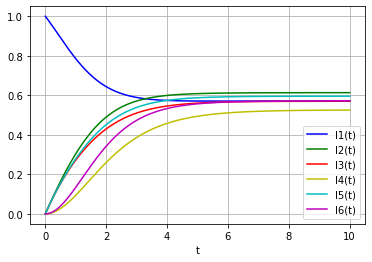

In [10]:
# Representación gráfica del estado de infección de cada uno de los nodos del grafo en función del tiempo:
import matplotlib.pyplot as plt
plt.plot(t, func_I[0], 'b', label='I1(t)')
plt.plot(t, func_I[1], 'g', label='I2(t)')
plt.plot(t, func_I[2], 'r', label='I3(t)')
plt.plot(t, func_I[3], 'y', label='I4(t)')
plt.plot(t, func_I[4], 'c', label='I5(t)')
plt.plot(t, func_I[5], 'm', label='I6(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

**Calculamos ahora la probabilidad máxima de infección de cada nodo:**

In [11]:
for i in range(len(func_I)):
    print(f"Probabilidad máxima de infección del nodo {i+1}: {max(func_I[i])}")

Probabilidad máxima de infección del nodo 1: 1.0
Probabilidad máxima de infección del nodo 2: 0.6133859340364363
Probabilidad máxima de infección del nodo 3: 0.5700673366987206
Probabilidad máxima de infección del nodo 4: 0.5253341748124013
Probabilidad máxima de infección del nodo 5: 0.59552785795065
Probabilidad máxima de infección del nodo 6: 0.571401797324831


In [12]:
# Vemos que la probabilidad máxima obtenida para el nodo 1 es 1, ya que parte del estado de infectado.
# Pero su valor se va estabilizando a lo largo del tiempo, llegando a valer al final del intervalo temporal 
# que hemos considerado:
print(f"Probabilidad a la que tiende el nodo 1 en el instante t={t_final}: {func_I[0][-1]}")

Probabilidad a la que tiende el nodo 1 en el instante t=10: 0.5714630337734822


### 2. Respecto al nodo 4, ¿qué nodo (distinto del 4) debe estar infectado en el instante inicial para que el nodo 4 tenga una probabilidad máxima de estar infectado en algún instante de tiempo?


--> Caso en el que en el instante inicial está infectado el nodo 1:


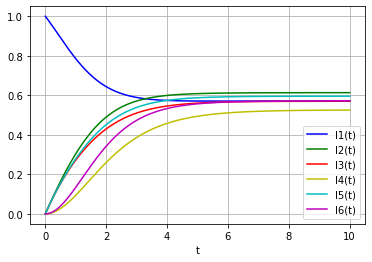

Probabilidad máxima de infección del nodo 1: 1.0
Probabilidad máxima de infección del nodo 2: 0.6133859340364363
Probabilidad máxima de infección del nodo 3: 0.5700673366987206
Probabilidad máxima de infección del nodo 4: 0.5253341748124013
Probabilidad máxima de infección del nodo 5: 0.59552785795065
Probabilidad máxima de infección del nodo 6: 0.571401797324831

La probabilidad máxima de infección del nodo 1 es 1 en el instante inicial porque parte 
    del estado de infectado.
Probabilidad a la que tiende el nodo 1 en el instante t=10: 0.5714630337734822

--> Caso en el que en el instante inicial está infectado el nodo 2:


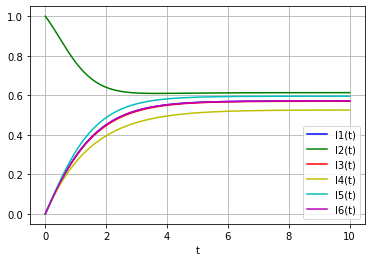

Probabilidad máxima de infección del nodo 1: 0.5714482244064005
Probabilidad máxima de infección del nodo 2: 1.0
Probabilidad máxima de infección del nodo 3: 0.5700838930123432
Probabilidad máxima de infección del nodo 4: 0.5256838944127101
Probabilidad máxima de infección del nodo 5: 0.5955675593226387
Probabilidad máxima de infección del nodo 6: 0.5714482244064005

La probabilidad máxima de infección del nodo 2 es 1 en el instante inicial porque parte 
    del estado de infectado.
Probabilidad a la que tiende el nodo 2 en el instante t=10: 0.6134094739386344

--> Caso en el que en el instante inicial está infectado el nodo 3:


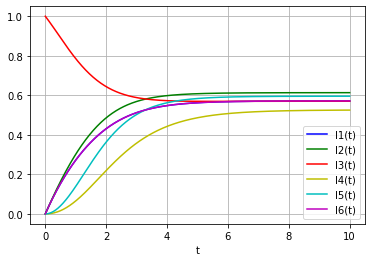

Probabilidad máxima de infección del nodo 1: 0.5714316629915409
Probabilidad máxima de infección del nodo 2: 0.6133790474359807
Probabilidad máxima de infección del nodo 3: 1.0
Probabilidad máxima de infección del nodo 4: 0.5251784237097937
Probabilidad máxima de infección del nodo 5: 0.5955076326669004
Probabilidad máxima de infección del nodo 6: 0.5714316629915409

La probabilidad máxima de infección del nodo 3 es 1 en el instante inicial porque parte 
    del estado de infectado.
Probabilidad a la que tiende el nodo 3 en el instante t=10: 0.570105577369444

--> Caso en el que en el instante inicial está infectado el nodo 5:


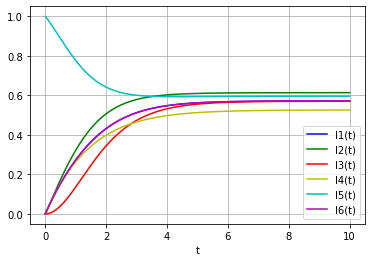

Probabilidad máxima de infección del nodo 1: 0.5714282402011549
Probabilidad máxima de infección del nodo 2: 0.6134047442486554
Probabilidad máxima de infección del nodo 3: 0.570042339420081
Probabilidad máxima de infección del nodo 4: 0.5257011103936274
Probabilidad máxima de infección del nodo 5: 1.0
Probabilidad máxima de infección del nodo 6: 0.5714282402011549

La probabilidad máxima de infección del nodo 5 es 1 en el instante inicial porque parte 
    del estado de infectado.
Probabilidad a la que tiende el nodo 5 en el instante t=10: 0.5955674281933678

--> Caso en el que en el instante inicial está infectado el nodo 6:


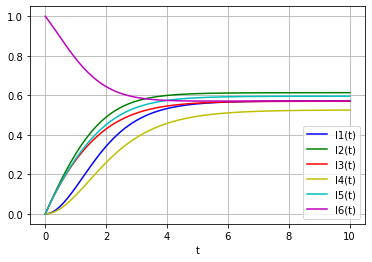

Probabilidad máxima de infección del nodo 1: 0.571401797324831
Probabilidad máxima de infección del nodo 2: 0.6133859340364362
Probabilidad máxima de infección del nodo 3: 0.5700673366987208
Probabilidad máxima de infección del nodo 4: 0.5253341748124014
Probabilidad máxima de infección del nodo 5: 0.5955278579506499
Probabilidad máxima de infección del nodo 6: 1.0

La probabilidad máxima de infección del nodo 6 es 1 en el instante inicial porque parte 
    del estado de infectado.
Probabilidad a la que tiende el nodo 6 en el instante t=10: 0.5714630337734823


-> A continuación podemos ver una gráfica en la que representamos los valores de probabilidad de 
infección del nodo 4 a lo largo del tiempo en cada uno de los casos:


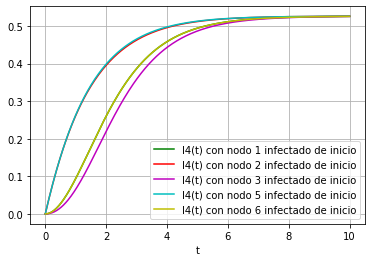


-> La probabilida máxima de estar infectado que alcanza el nodo 4 en todos los casos considerados 
es 0.5257011103936274, y se da cuando es el nodo 5 el que está infectado en el instante inicial.


In [13]:
# Importamos la función odeint del módulo scipy.integrate:
# from scipy.integrate import odeint
# Importamos el módulo pyplot de matplotlib para realizar la representación gráfica de las soluciones:
# import matplotlib.pyplot as plt
# Suponemos que las constantes del modelo son:
# beta = 0.5
# gamma = 0.2
# phi = 0.7
# Utilizamos el modelo de infección que ya hemos definido: modelo_infeccion

# Creamos una lista donde almacenaremos los valores de probabilidad del nodo 4 en cada uno de los casos estudiados:
I4 = []
# Creamos una lista donde almacenaremos la probabilidad máxima del nodo 4 de estar infectado en todos los casos:
max_I4 = []

for i in range(len(MG)):
    if i == 3:  # Porque nos piden nodos infectados en el instante inicial distintos del 4.
        continue
    
    # Generamos las condiciones iniciales para cada caso:
    I0 = np.zeros(len(MG))
    I0[i] = 1
    
    # Generaremos una solución en n muestras espaciadas uniformemente en el intervalo temporal [0, t_final]:
    n = 401
    t_final = 10
    t = np.linspace(0,t_final,n)
    
    # Llamamos a la función odeint para generar la solución de cada caso:
    I = odeint(modelo_infeccion, I0, t, args = (beta, gamma, phi))
    
    # La solución obtenida del sistema de ecuaciones diferenciales es una matriz de 
    # dimensiones (n, len(matriz_adyacencia_del_grafo)). Cada una de sus columnas se corresponden con la 
    # solución de la función que nos dan la probabilidad de infección de cada uno de sus nodos en cada 
    #instante de tiempo Ii(t).
    
    # Por lo tanto, los valores de cada una de las funciones en los instantes de tiempo considerados son:
    func_I = []
    for j in range(len(MG)):
        func_I.append(I[:, j])
        if j == 3:  # Almaceno los valores de la función de probabilidad del nodo 4 en cada uno de los casos.
            I4.append(I[:, j])
    
    # Representación gráfica del estado de infección de cada uno de los nodos del grafo en función del tiempo:
    print(f"\n--> Caso en el que en el instante inicial está infectado el nodo {i+1}:")
    plt.plot(t, func_I[0], 'b', label='I1(t)')
    plt.plot(t, func_I[1], 'g', label='I2(t)')
    plt.plot(t, func_I[2], 'r', label='I3(t)')
    plt.plot(t, func_I[3], 'y', label='I4(t)')
    plt.plot(t, func_I[4], 'c', label='I5(t)')
    plt.plot(t, func_I[5], 'm', label='I6(t)')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()
    
    # Probabilidad máxima de infección de cada nodo en cada caso:
    for k in range(len(func_I)):
        print(f"Probabilidad máxima de infección del nodo {k+1}: {max(func_I[k])}")
    
    # Probabilidad a la que tiende el nodo inicialmente infectado:
    print(f"""\nLa probabilidad máxima de infección del nodo {i+1} es 1 en el instante inicial porque parte 
    del estado de infectado.""")
    print(f"Probabilidad a la que tiende el nodo {i+1} en el instante t={t_final}: {func_I[i][-1]}")
    
    # Almacenamos la probabilidad máxima de infección del nodo 4 en cada uno de los casos considerados:
    max_I4.append((max(func_I[3]), i+1))

print(f"""\n\n-> A continuación podemos ver una gráfica en la que representamos los valores de probabilidad de 
infección del nodo 4 a lo largo del tiempo en cada uno de los casos:""")
plt.plot(t, I4[0], 'g', label='I4(t) con nodo 1 infectado de inicio')
plt.plot(t, I4[1], 'r', label='I4(t) con nodo 2 infectado de inicio')
plt.plot(t, I4[2], 'm', label='I4(t) con nodo 3 infectado de inicio')
plt.plot(t, I4[3], 'c', label='I4(t) con nodo 5 infectado de inicio')
plt.plot(t, I4[4], 'y', label='I4(t) con nodo 6 infectado de inicio')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
print(f"""\n-> La probabilida máxima de estar infectado que alcanza el nodo 4 en todos los casos considerados 
es {max(max_I4)[0]}, y se da cuando es el nodo {max(max_I4)[1]} el que está infectado en el instante inicial.""")

### 3. ¿Cuál es la probabilidad máxima de infección del nodo 3 (a lo largo del tiempo) si en el instante inicial son los nodos 1 y 5 los que están infectados?

In [14]:
# Importamos la función odeint del módulo scipy.integrate:
# from scipy.integrate import odeint
# Importamos el módulo pyplot de matplotlib para realizar la representación gráfica de las soluciones:
# import matplotlib.pyplot as plt
# Suponemos que las constantes del modelo son:
# beta = 0.5
# gamma = 0.2
# phi = 0.7
# Utilizamos el modelo de infección que ya hemos definido: modelo_infeccion

In [15]:
# Las condiciones iniciales en este caso son:
I0 = [1, 0, 0, 0, 1, 0]

In [16]:
# Generaremos una solución en n muestras espaciadas uniformemente en el intervalo temporal [0, t_final]:
n = 401
t_final = 10
t = np.linspace(0,t_final,n)

In [17]:
# Llamamos a la función odeint para generar la solución:
I = odeint(modelo_infeccion, I0, t, args = (beta, gamma, phi))

**Si representamos la solución obtenemos:**

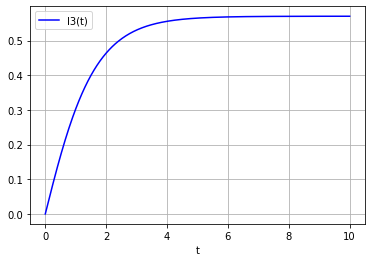

In [18]:
# La solución obtenida del sistema de ecuaciones diferenciales es una matriz de 
# dimensiones (número de instantes de tiempo considerados, número de nodos del grafo). Cada una de sus columnas 
# se corresponden con la solución de la función que nos dan la probabilida de infección de cada uno de sus nodos 
# en cada instante de tiempo Ii(t).

# A nosotros en este caso nos interesa la probabilidad de infección del nodo 3.

# Representación gráfica del estado de infección del nodo 3 del grafo en función del tiempo:
import matplotlib.pyplot as plt
plt.plot(t, I[:, 2], 'b', label='I3(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

**Calculamos ahora la probabilidad máxima de infección del nodo 3:**

In [19]:
print(f"Probabilidad máxima de infección del nodo 3: {max(I[:, 2])}")

Probabilidad máxima de infección del nodo 3: 0.5701182358062425
